# Plotting a sine function in time domain

The code below contains the plot of a 0.15 Hz frequency sine wave sampled at 1 Hz.

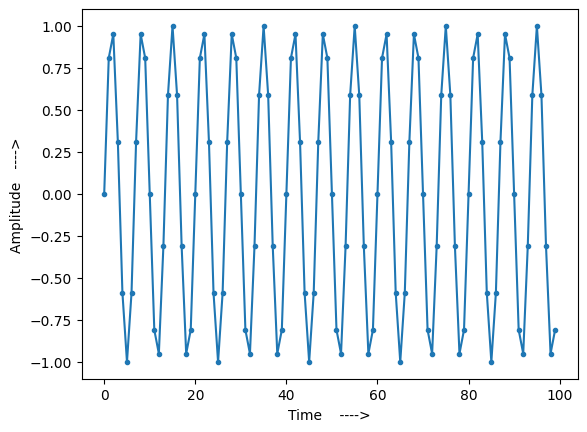

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Frequency of the wave
F = 0.15
# 100s Time array (x-axis) (from 0-99s)
t = np.arange(100)
# Sine function with f = 0.15 Hz sampled for 100s
s = np.sin(2 * np.pi * F * t)
# Create and disply the plot in time domain
plt.plot(t, s, '.-')
plt.xlabel('Time    ---->')
plt.ylabel('Amplitude   ---->')
plt.show()


# Plotting a sine function in frequency domain

We now use Fast Fourier Transform (FFT) to convert the sine function above into to frequency domain and then use a shift function to align the x axis with 0 Hz as the central frequency and -0.5 and 0.5 Hz on either ends.

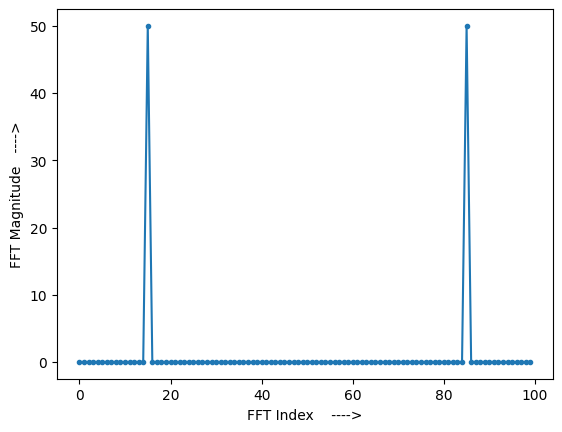

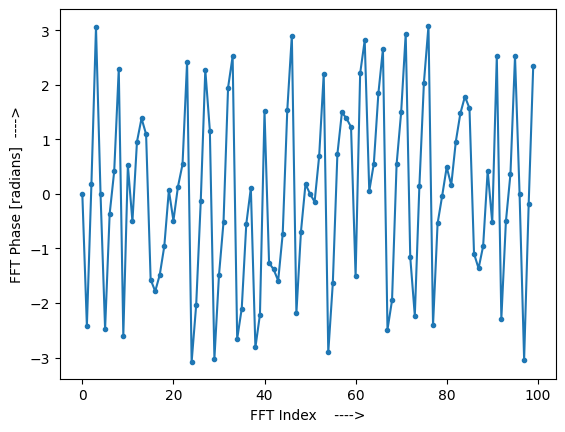

In [14]:
# The FFT of the sine function
S = np.fft.fft(s)
# Magnitude of this function
S_mag = np.abs(S)
# Phase of this function in radians
S_phase = np.angle(S)

# Plot the graph for magnitude
plt.figure(0)
plt.plot(t, S_mag, '.-')
plt.xlabel('FFT Index    ---->')
plt.ylabel('FFT Magnitude   ---->')

# Plot the graph for phase
plt.figure(1)
plt.plot(t, S_phase, '.-')
plt.xlabel('FFT Index    ---->')
plt.ylabel('FFT Phase [radians]  ---->')

# Display both the plots
plt.show()

Plot the same but with FFT shift to correct x-axis to frequency domain

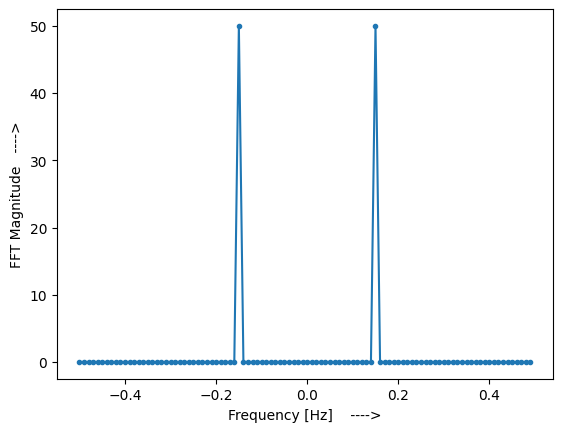

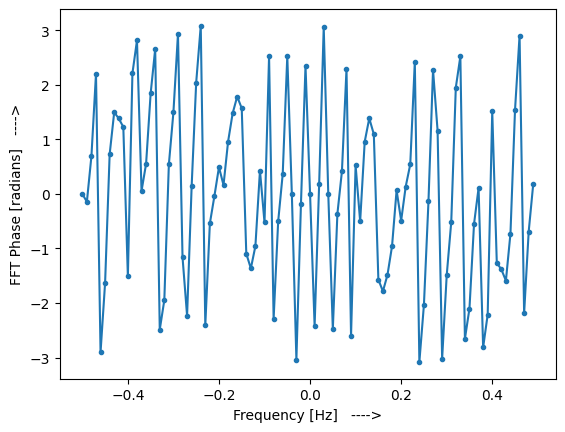

In [15]:
# Sampling frequency (in Hz)
Fs = 1
# Number of samples
N = 100
# Frequencies in x-axis
f = np.arange(Fs/-2, Fs/2, Fs/N)

# Applying the FFT shift to S
S = np.fft.fftshift(S)
# Magnitude of this function
S_mag = np.abs(S)
# Phase of this function in radians
S_phase = np.angle(S)

# Plot the graph for magnitude
plt.figure(0)
plt.plot(f, S_mag, '.-')
plt.xlabel('Frequency [Hz]    ---->')
plt.ylabel('FFT Magnitude   ---->')

# Plot the graph for phase
plt.figure(1)
plt.plot(f, S_phase, '.-')
plt.xlabel('Frequency [Hz]   ---->')
plt.ylabel('FFT Phase [radians]   ---->')

# Display both the plots
plt.show()

# Windowing

To make our function more suitable for FFT, we use windowing. In this case we will apply Hamming window function to taper both the ends of the function values towards zero. This will ensure that the signal will start and end at zero and will connect.

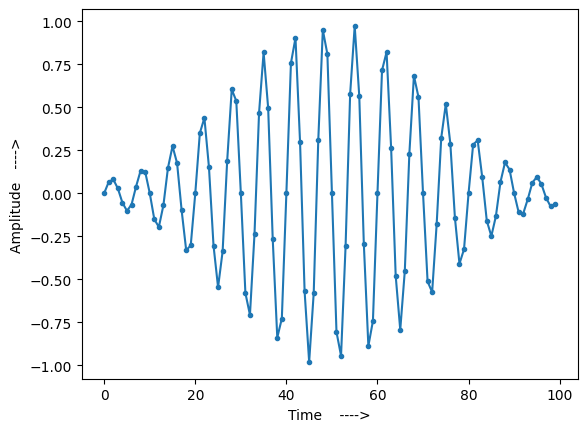

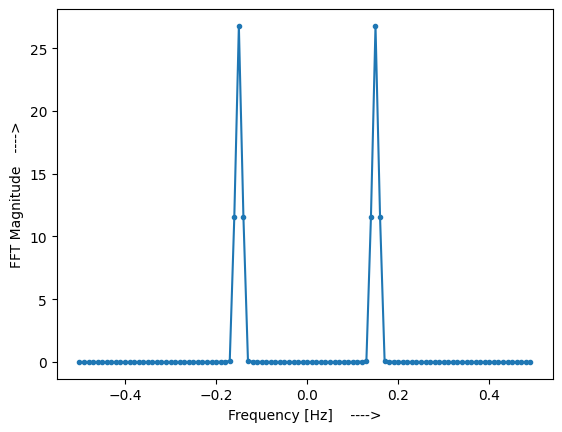

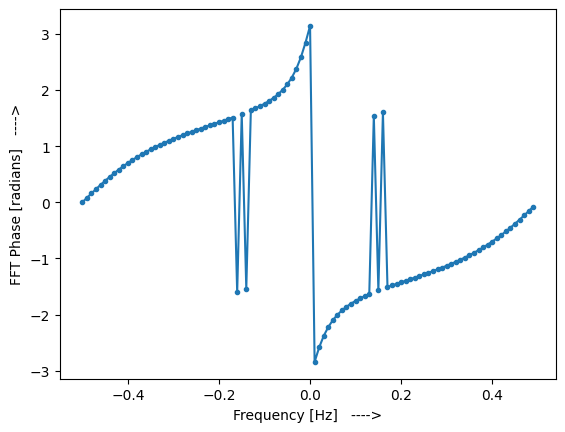

In [16]:
# We do this before calculating s, so we rewrite the code so far but this time with windowing

import numpy as np
import matplotlib.pyplot as plt

'''
## For Time domain ##
'''

# Frequency of the wave
F = 0.15
# 100s Time array (x-axis) (from 0-99s)
t = np.arange(100)
# Sine function with f = 0.15 Hz sampled for 100s
s = np.sin(2 * np.pi * F * t)
# Apply Hamming window function to sine function with a window size of 100
s = s * np.hamming(100)
# Create and disply the plot in time domain
plt.plot(t, s, '.-')
plt.xlabel('Time    ---->')
plt.ylabel('Amplitude   ---->')
plt.show()

'''
## For Frequency domain ##
'''

# Sampling frequency (in Hz)
Fs = 1
# Number of samples
N = 100
# Frequencies in x-axis
f = np.arange(Fs/-2, Fs/2, Fs/N)

# The FFT of the sine function
S = np.fft.fft(s)
# Applying the FFT shift to S
S = np.fft.fftshift(S)
# Magnitude of this function
S_mag = np.abs(S)
# Phase of this function in radians
S_phase = np.angle(S)

# Plot the graph for magnitude
plt.figure(0)
plt.plot(f, S_mag, '.-')
plt.xlabel('Frequency [Hz]    ---->')
plt.ylabel('FFT Magnitude   ---->')

# Plot the graph for phase
plt.figure(1)
plt.plot(f, S_phase, '.-')
plt.xlabel('Frequency [Hz]   ---->')
plt.ylabel('FFT Phase [radians]   ---->')

# Display both the plots
plt.show()


# Spectrogram / Waterfall

A spectrogram is the plot that shows frequency over time. It is simply a bunch of FFTs stacked together (vertically, if you want frequency on the horizontal axis). We can also show it in real-time, often referred to as a waterfall. A spectrum analyzer is the piece of equipment that shows this spectrogram/waterfall.

An example code to produce a signal which is simply a tone in white noise

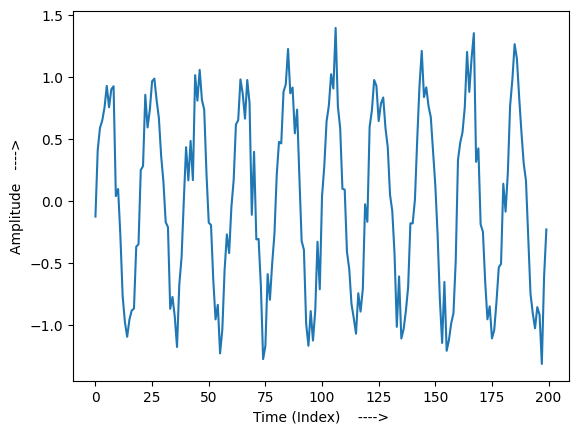

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Sampling frequency (or sampling rate) of 1 MHz
Fs = 1e6
# Frequency of the signal (i.e. frequency of the tone)
F = 50e3

# Time vector
# We divide by Fs because 1/Fs is simply the time period (T) of sampling
# It simply multiplies each indice with T, so each value is a multiple of T
# Because T is the smallest interval possible by sampling with a frequency of Fs
t = np.arange(1024 * 1000) / Fs

# Signal with some noise
x = np.sin(2 * np.pi * F * t) + 0.2 * np.random.randn(len(t))

# Plot the first 200 samples
plt.plot(np.arange(200), x[:200]) # Instead of using actual time, we use indices for simplicity
plt.xlabel('Time (Index)    ---->')
plt.ylabel('Amplitude   ---->')
plt.show()

Now coming to the spectrogram code

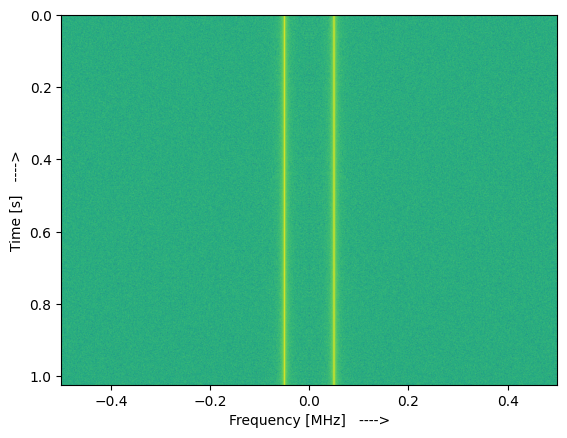

In [19]:
fft_size = 1024 # Each row will contain 1024 samples
num_rows = len(x) // fft_size # We want integer division to get a whole number of rows

# The spectrogram containing fft_rows rows, each containging fft_size samples (initially all zeroes)
spectrogram = np.zeros((num_rows, fft_size))

# Populate the spectrogram with values of x
for i in range(num_rows):
  # Since it is a 2D Numpy matrix, [i, :] will only select elements of ith row
  # spectrogram[i:] would have selected a slice of all elements from i till the end of matrix instead
  # FFT: Get Frequency content (Complex numbers).
  # Abs: Get Magnitude (Amplitude).
  # **2: Convert Amplitude to Power.
  # log10: Convert Power to Log Scale.
  # 10*: Convert Log Scale to Decibels.
  spectrogram[i, :] = 10 * np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i * fft_size : (i+1) * fft_size]))) ** 2)

# Display the spectrogram
plt.imshow(spectrogram, aspect='auto', extent=[Fs / -2 / 1e6, Fs / 2 / 1e6, len(x) / Fs, 0])
plt.xlabel('Frequency [MHz]   ---->')
plt.ylabel('Time [s]   ---->')
plt.show()